In [1]:
import pandas as pd
import numpy as np
db_albuns = pd.read_csv('spotify_albums.csv')
db_artists = pd.read_csv('spotify_artists.csv')
db_tracks = pd.read_csv('spotify_tracks.csv')


In [2]:
cols_drop_albuns = ['Unnamed: 0', 'external_urls', 'href', 'uri', 'type', 'available_markets', 'images', 'track_name_prev']
cols_drop_artists = ['Unnamed: 0', 'type', 'track_id', 'track_name_prev']
cols_drop_tracks = ['Unnamed: 0', 'analysis_url', 'href', 'available_markets', 'preview_url']

db_albuns = db_albuns.drop(columns=cols_drop_albuns, errors='ignore')
db_artists = db_artists.drop(columns=cols_drop_artists, errors='ignore')
db_tracks = db_tracks.drop(columns=cols_drop_tracks, errors='ignore')


##Merge das tabelas

In [3]:
merge1 = pd.merge(db_albuns, db_artists, left_on='artist_id', right_on='id', how='inner')

db_final = pd.merge(merge1, db_tracks, left_on='id_x', right_on='album_id', how='inner')

db_final.drop(columns=['id_x', 'name_x', 'id_y', 'artists_id'], inplace=True)


db_final

,album_type,artist_id,release_date,release_date_precision,total_tracks,track_id,artist_popularity,followers,genres,name_y,album_id,name,playlist,popularity
0,single,3DiDSECUqqY1AuBP8qtaIa,2019-02-08,day,6,2iejTMy9XZ8Gaae0aQ2yl0,79,5946074,"['hip pop', 'neo soul', 'pop', 'r&b', 'urban c...",Alicia Keys,1gAM7M4rBwEbSPeAQR2nx1,If I Ain't Got You - Radio Edit,Chillout Session,41.0
1,album,6s1pCNXcbdtQJlsnM1hRIA,2019-03-01,day,8,1WQfghEjszJJ4H8MAWrQ2C,57,135831,"['classical', 'compositional ambient', 'russia...",Dmitri Shostakovich,4KfJZV7WfolYlxBzOTo66s,"Symphony No. 5 in D Minor, Op. 48: II Allegretto",Classical New Releases: Spotify Picks,37.0
2,single,5YjfNaHq05WrwldRe1QSBc,2019-03-14,day,1,3jJKj4QTK3v18ZSwpk7AcV,18,118,[],Brandon Mints,7nLYY7uAVUb57kpd7tZxnS,Take My Bass,Bangers,4.0
3,single,2G9Vc16JCpnZmK4uGH46Fa,2016-11-16,day,1,1xGtDafUZbHyYC3Xarcbrj,24,309,[],DØ CHEF DØ,6p20Rt4x2Qn5mUMRi1s6pj,Hypnotizing (Are U),Smukfest 2019,27.0
4,single,2dwM9OcE4c3Ph1UBINSodx,2018-07-20,day,1,0gWtsXvXOzAT6FtM3ur8in,24,1394,[],Alejo García,1XeoOqC1q7U2iyLEQJ64cu,Sunshine,Nuevo Macondo,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101139,album,73Vk4dL8kYkbRJxWJDq1wL,2011-03-31,day,11,7GOBsKucPG5Bh8qzStmrQ6,40,22403,"['andean', 'chilean indie', 'chilean rock', 'n...",La Floripondio,4DifRQy4Dyey9NSS7ywnEx,Bailando Como Mono,Los 90 Chile,46.0
101140,album,3yW6jTzGjHUUkLvLkjLOVn,2006-06-10,day,13,0ujklxrVM2jwpLMgbTwTd1,47,59326,"['australian alternative rock', 'australian in...",Eskimo Joe,4PXy3cBCNeY0ZVKTOGi9Cw,"Black Fingernails, Red Wine",Aussie Alternative Classics,54.0
101141,album,4iudEcmuPlYNdbP3e1bdn1,1997,year,13,58nHFSWj5N5JxNtWgS85TL,63,552438,"['alternative metal', 'alternative rock', 'aus...",Silverchair,511p6iaCuK8Sr0BYdpcfkq,The Door,Aussie Alternative Classics,44.0
101142,album,4iudEcmuPlYNdbP3e1bdn1,1997,year,13,58nHFSWj5N5JxNtWgS85TL,63,552438,"['alternative metal', 'alternative rock', 'aus...",Silverchair,511p6iaCuK8Sr0BYdpcfkq,Freak,Aussie Alternative Classics,59.0


##asdasd

In [4]:
import numpy as np


db_final['genres'] = db_final['genres'].apply(lambda x: np.nan if x == '[]' else x)


db_final['genres'] = db_final.groupby('playlist')['genres'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
db_final

/var/folders/_l/4nhps33j6z54025qpbx1zqh40000gn/T/ipykernel_28560/139738318.py:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  db_final['genres'] = db_final.groupby('playlist')['genres'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))
/var/folders/_l/4nhps33j6z54025qpbx1zqh40000gn/T/ipykernel_28560/139738318.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  db_final['genres'] = db_final.groupby('playlist')['genres'].transform(lambda x: x.fillna(method='ffill').fillna(method='bfill'))


,album_type,artist_id,release_date,release_date_precision,total_tracks,track_id,artist_popularity,followers,genres,name_y,album_id,name,playlist,popularity
0,single,3DiDSECUqqY1AuBP8qtaIa,2019-02-08,day,6,2iejTMy9XZ8Gaae0aQ2yl0,79,5946074,"['hip pop', 'neo soul', 'pop', 'r&b', 'urban c...",Alicia Keys,1gAM7M4rBwEbSPeAQR2nx1,If I Ain't Got You - Radio Edit,Chillout Session,41.0
1,album,6s1pCNXcbdtQJlsnM1hRIA,2019-03-01,day,8,1WQfghEjszJJ4H8MAWrQ2C,57,135831,"['classical', 'compositional ambient', 'russia...",Dmitri Shostakovich,4KfJZV7WfolYlxBzOTo66s,"Symphony No. 5 in D Minor, Op. 48: II Allegretto",Classical New Releases: Spotify Picks,37.0
2,single,5YjfNaHq05WrwldRe1QSBc,2019-03-14,day,1,3jJKj4QTK3v18ZSwpk7AcV,18,118,"['deep groove house', 'deep house', 'disco hou...",Brandon Mints,7nLYY7uAVUb57kpd7tZxnS,Take My Bass,Bangers,4.0
3,single,2G9Vc16JCpnZmK4uGH46Fa,2016-11-16,day,1,1xGtDafUZbHyYC3Xarcbrj,24,309,"['australian garage punk', 'australian psych',...",DØ CHEF DØ,6p20Rt4x2Qn5mUMRi1s6pj,Hypnotizing (Are U),Smukfest 2019,27.0
4,single,2dwM9OcE4c3Ph1UBINSodx,2018-07-20,day,1,0gWtsXvXOzAT6FtM3ur8in,24,1394,['musica llanera'],Alejo García,1XeoOqC1q7U2iyLEQJ64cu,Sunshine,Nuevo Macondo,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101139,album,73Vk4dL8kYkbRJxWJDq1wL,2011-03-31,day,11,7GOBsKucPG5Bh8qzStmrQ6,40,22403,"['andean', 'chilean indie', 'chilean rock', 'n...",La Floripondio,4DifRQy4Dyey9NSS7ywnEx,Bailando Como Mono,Los 90 Chile,46.0
101140,album,3yW6jTzGjHUUkLvLkjLOVn,2006-06-10,day,13,0ujklxrVM2jwpLMgbTwTd1,47,59326,"['australian alternative rock', 'australian in...",Eskimo Joe,4PXy3cBCNeY0ZVKTOGi9Cw,"Black Fingernails, Red Wine",Aussie Alternative Classics,54.0
101141,album,4iudEcmuPlYNdbP3e1bdn1,1997,year,13,58nHFSWj5N5JxNtWgS85TL,63,552438,"['alternative metal', 'alternative rock', 'aus...",Silverchair,511p6iaCuK8Sr0BYdpcfkq,The Door,Aussie Alternative Classics,44.0
101142,album,4iudEcmuPlYNdbP3e1bdn1,1997,year,13,58nHFSWj5N5JxNtWgS85TL,63,552438,"['alternative metal', 'alternative rock', 'aus...",Silverchair,511p6iaCuK8Sr0BYdpcfkq,Freak,Aussie Alternative Classics,59.0


In [5]:
print(db_final['genres'].isna().sum())

956


##Top 7 generos mais populares

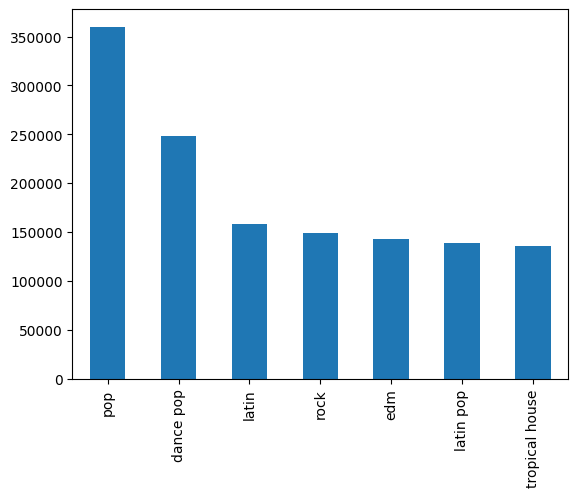

In [6]:
import matplotlib.pyplot as plt
from ast import literal_eval

db_final['genres'] = db_final['genres'].apply(lambda x: literal_eval(x) if isinstance(x, str) else x)

genero_pesado = {}

for _, row in db_final.iterrows():
    generos = row['genres']
    peso = row['popularity']
    
    # Pula se a coluna genres não for lista ou se a popularidade for nula
    if not isinstance(generos, list) or pd.isna(peso):
        continue
    
    for genero in generos:
        genero_pesado[genero] = genero_pesado.get(genero, 0) + peso

genero_series = pd.Series(genero_pesado).sort_values(ascending=False)

top_10_generos = genero_series.head(7)
top_10_generos.plot(kind='bar')
plt.show()



##Popularidade por tempo

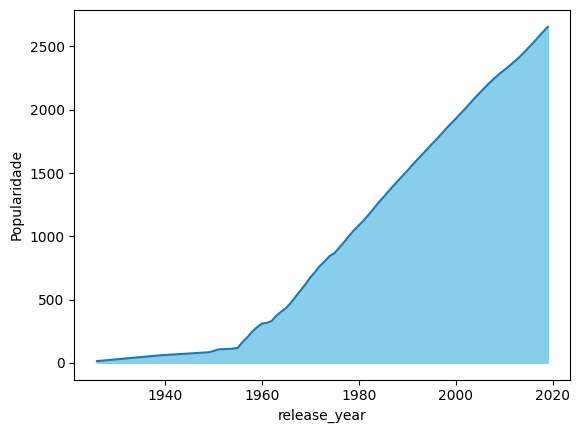

In [7]:
db_final['release_date'] = pd.to_datetime(db_final['release_date'], errors='coerce')
db_final['release_year'] = db_final['release_date'].dt.year


popularidade_por_ano = db_final.groupby('release_year')['popularity'].mean().dropna()

pop_acumulada = popularidade_por_ano.cumsum()

pop_acumulada.plot(kind='line')
plt.fill_between(pop_acumulada.index, pop_acumulada.values, color='skyblue')
plt.ylabel('Popularidade')

plt.show()

##Popularidade por tipo de lancamento

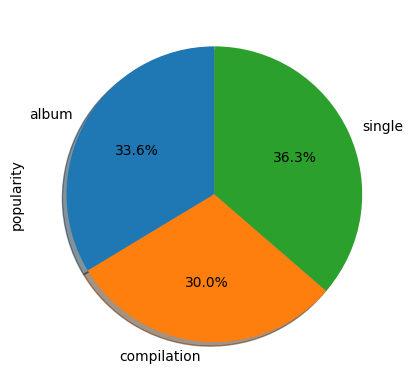

In [8]:
popularidade_por_album_type = db_final.groupby('album_type')['popularity'].mean().dropna()
popularidade_por_album_type.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True) 

plt.show()

##Qtd de musica e popularidade

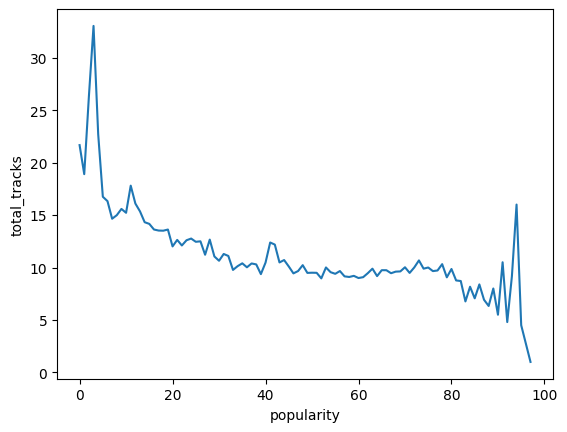

In [9]:
popularidade_por_qtd = db_final.groupby('popularity')['total_tracks'].mean().dropna()

popularidade_por_qtd.plot(kind='line')
plt.ylabel('total_tracks')
plt.show()

##Top 20 artistas

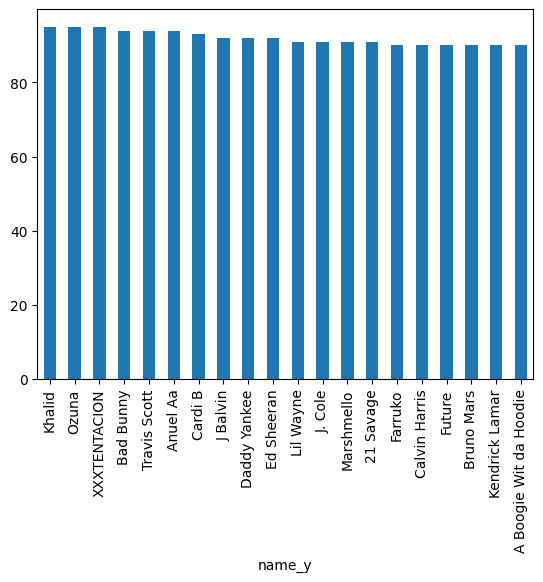

In [10]:
artista_pop = db_final.groupby('name_y')['artist_popularity'].mean()

top_10_artist = artista_pop.sort_values(ascending=False).head(20)

top_10_artist.plot(kind='bar')

teste = db_final[db_final['name_y'] == 'Bruno Mars']

plt.show()

##Artistas por generos

In [11]:
pop_artistas = db_final[db_final['genres'].apply(lambda x: isinstance(x, list) and 'pop' in [g.lower() for g in x])]
dance_pop_artistas = db_final[db_final['genres'].apply(lambda x: isinstance(x, list) and 'dance pop' in [g.lower() for g in x])]
latin_artistas = db_final[db_final['genres'].apply(lambda x: isinstance(x, list) and 'latin' in [g.lower() for g in x])]

pop_ranking = pop_artistas.groupby('name_y')['artist_popularity'].mean().sort_values(ascending=True)
dancepop_ranking = dance_pop_artistas.groupby('name_y')['artist_popularity'].mean().sort_values(ascending=True)
latin_ranking = latin_artistas.groupby('name_y')['artist_popularity'].mean().sort_values(ascending=True)


##Top Pop Artistas

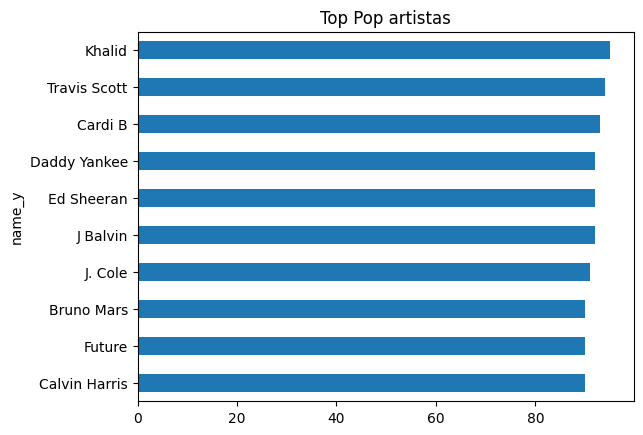

In [12]:
pop_ranking.tail(10).plot(kind='barh')
plt.title('Top Pop artistas')
plt.show()

##Top Dance Pop artistas

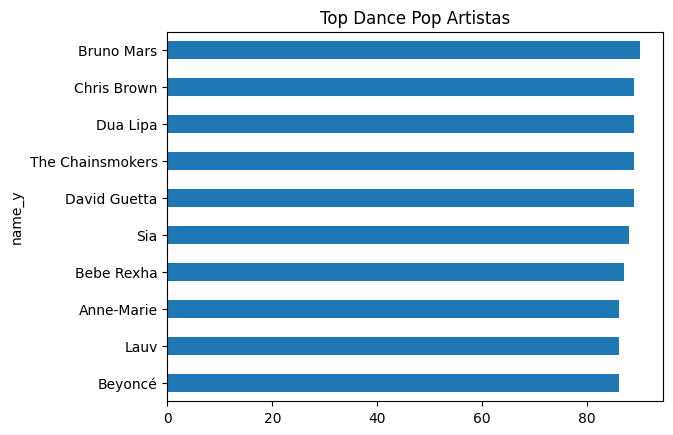

In [13]:
dancepop_ranking.tail(10).plot(kind='barh')
plt.title('Top Dance Pop Artistas')
plt.show()

##Top Latin artistas

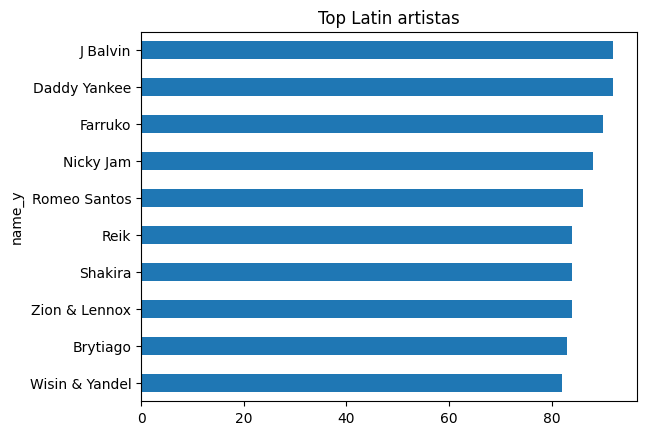

In [14]:
latin_ranking.tail(10).plot(kind='barh')
plt.title('Top Latin artistas')
plt.show()

In [15]:
import plotly.express as px

fig = px.scatter(db_final, x='followers', y='artist_popularity',title='Relação entre Followers e Popularidade do Artista ',labels={'followers': 'Número de Seguidores', 'artist_popularity': 'Popularidade do Artista'})
fig.update_traces(marker=dict(size=8, opacity=0.7), selector=dict(mode='markers'))
fig.update_layout(template='plotly_white')

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
import plotly.express as px

unique_artistas = db_final.drop_duplicates(subset='name_y')
top_10_artistas = unique_artistas.sort_values('followers', ascending=False).head(10)
fig = px.bar(top_10_artistas,x='followers',y='name_y',orientation='h',title='Top 10 Artistas com Mais Seguidores ',labels={'followers': 'Número de Seguidores', 'name_y': 'Artista'},)
fig.update_yaxes(categoryorder='total ascending')
fig.update_layout(template='plotly_white')

fig.show()

In [ ]:
pop_artistas = db_final[db_final['genres'].apply(lambda x: isinstance(x, list) and 'pop' in [g.lower() for g in x])]
unique_pop_artistas = pop_artistas.drop_duplicates(subset='name_y')
top_10_pop_artistas = unique_pop_artistas.sort_values('followers', ascending=False).head(10)
fig = px.bar(
    top_10_pop_artistas,
    x='followers',
    y='name_y',
    orientation='h',
    title='Top 10 Artistas Pop com Mais Seguidores do Pop',
    labels={'followers': 'Número de Seguidores', 'name_y': 'Artista'},)

fig.update_yaxes(categoryorder='total ascending')
fig.update_layout(template='plotly_white')

fig.show()

In [ ]:

db_final['release_year'] = pd.to_datetime(db_final['release_date']).dt.year
year_counts = db_final['release_year'].value_counts().reset_index()
year_counts.columns = ['Year', 'Count']

fig = px.bar(
    year_counts,
    x='Year',
    y='Count',
    title='Número de Lançamentos por Ano ',
    labels={'Year': 'Ano', 'Count': 'Quantidade de Lançamentos'},)

fig.update_layout(template='plotly_white')

fig.show()

In [ ]:
artistas_2018 = db_final[db_final['release_year'] == 2018]
unique_artistas_2018 = artistas_2018.drop_duplicates(subset='name_y')
top_artistas_2018 = unique_artistas_2018.sort_values('followers', ascending=False).head(10)
fig = px.bar(
    top_artistas_2018,
    x='followers',
    y='name_y',
    orientation='h',
    title='Top Artistas de 2018 com Mais Seguidores ',
    labels={'followers': 'Número de Seguidores', 'name_y': 'Artista'},)

fig.update_yaxes(categoryorder='total ascending')
fig.update_layout(template='plotly_white')

fig.show()


In [ ]:
album_popularity = db_final.groupby('playlist')['popularity'].mean().reset_index()
top_albuns = album_popularity.sort_values('popularity', ascending=False).head(10)
fig = px.bar(
    top_albuns,
    x='popularity',
    y='playlist',
    orientation='h',
    title='Top 10 Álbuns Mais Populares (Média de Popularidade das Músicas) ',
    labels={'popularity': 'Popularidade Média', 'playlist': 'Álbum'},)

fig.update_yaxes(categoryorder='total ascending')
fig.update_layout(template='plotly_white')

fig.show()

C:\Users\fguar\AppData\Local\Temp\ipykernel_24724\3364978040.py:11: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




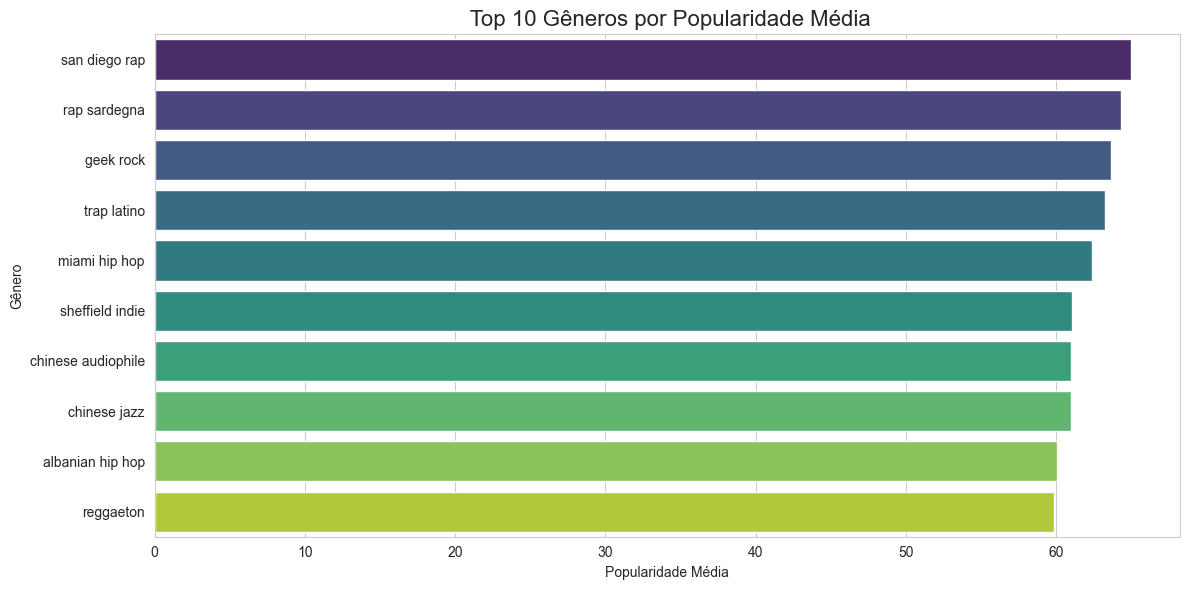

In [ ]:
import seaborn as sns

sns.set_style('whitegrid') 

db_exploded = db_final.explode('genres')

# Top 10 gêneros por média de popularidade
top_genres = db_exploded.groupby('genres')['popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title(' Top 10 Gêneros por Popularidade Média', fontsize=16)
plt.xlabel('Popularidade Média')
plt.ylabel('Gênero')
plt.tight_layout()
plt.show()

C:\Users\fguar\AppData\Local\Temp\ipykernel_24724\235802805.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




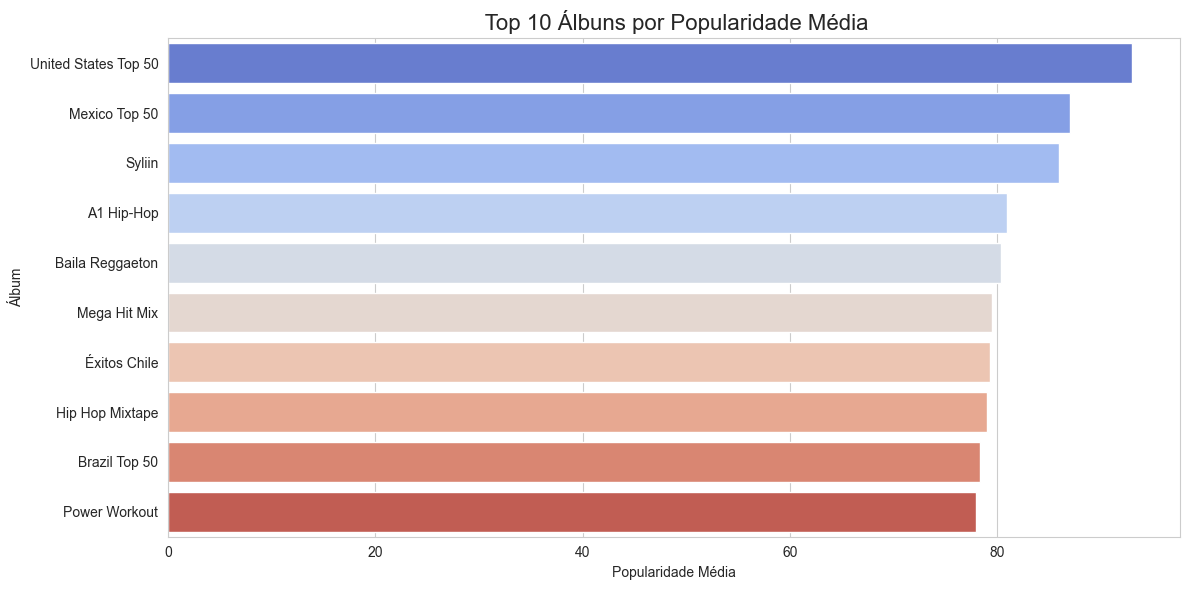

In [ ]:
#playlist com mais musicas populares
top_albums = db_final.groupby('playlist')['popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_albums.values, y=top_albums.index, palette='coolwarm')
plt.title(' Top 10 playlists por Popularidade Média', fontsize=16)
plt.xlabel('Popularidade Média')
plt.ylabel('playlist')
plt.tight_layout()
plt.show()